# Определение перспективного тарифа для телеком-компании

«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


**Описание тарифов**

`Тариф «Смарт»`
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей


`Тариф «Ультра»`
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей


Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна».

**Цель исследования:** проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Ход исследования:** в нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Выгрузим данные и проведем исследование в следующем порядке: 

1. Откроем файл с данными и изучим общую информацию.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Проверка гипотез.
5. Общий вывод.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd # Импортируем библиотеки 
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try: # Откроем файлы с данными
    df_users = pd.read_csv('users.csv')
    df_calls = pd.read_csv('calls.csv')
    df_messages = pd.read_csv('messages.csv')
    df_internet = pd.read_csv('internet.csv')
    df_tariffs = pd.read_csv('tariffs.csv')
except:
    df_users = pd.read_csv('/datasets/users.csv')
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')

Рассмотрим каждый датасет.

1. Таблица **users** (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

In [3]:
display(df_users.head(5))
display(df_users.tail(5))
display(df_users.sample(5))
display(df_users.describe())
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
477,1477,70,NaN,Набережные Челны,Геральд,Серов,2018-04-24,smart
256,1256,55,NaN,Санкт-Петербург,Алевтина,Панфилова,2018-09-28,smart
174,1174,29,NaN,Санкт-Петербург,Лолита,Розанова,2018-02-17,smart
309,1309,28,NaN,Казань,Юлия,Касьянова,2018-10-05,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


___

2. Таблица **calls** (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

In [4]:
display(df_calls.head(5))
display(df_calls.tail(5))
display(df_calls.sample(5))
display(df_calls.describe())
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


,id,call_date,duration,user_id
29697,1075_103,2018-12-22,6.27,1075
1008,1003_301,2018-11-28,13.04,1003
110219,1282_1113,2018-09-08,8.48,1282
55517,1142_161,2018-03-28,20.57,1142
29156,1072_482,2018-07-31,15.85,1072


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


___

3. Таблица **messages** (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

In [5]:
display(df_messages.head(5))
display(df_messages.tail(5))
display(df_messages.sample(5))
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


,id,message_date,user_id
79610,1332_230,2018-12-12,1332
88196,1369_121,2018-10-14,1369
100346,1411_182,2018-10-11,1411
40544,1172_28,2018-08-22,1172
79662,1333_18,2018-10-10,1333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


___

4. Таблица **internet** (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

In [6]:
display(df_internet.head(5))
display(df_internet.tail(5))
display(df_internet.sample(5))
display(df_internet.describe())
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


,Unnamed: 0,id,mb_used,session_date,user_id
82743,82743,1281_59,501.36,2018-06-24,1281
1607,1607,1006_238,570.11,2018-10-06,1006
71145,71145,1241_49,0.00,2018-11-16,1241
10384,10384,1035_219,316.57,2018-08-11,1035
109809,109809,1374_20,0.00,2018-09-09,1374


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


____

5. Таблица **tariffs** (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fe`e — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [7]:
display(df_tariffs.head())
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод**

- Распределение данных выглядит адекватно.
- Наименование столбцов корректно.
- Пропуски есть только в таблице df_users в столбце `churn_date` (дата прекращения пользования тарифом), но это обусловлено тем, что тариф ещё действовал на момент выгрузки данных.
- Необходимо поменять во всех таблицах тип данных в столбцах с датой, так как вместо *datetime* они обозначены *odject*.

Первичное ознакомление с данными проведено, рассмотрим данные более подробно и приступим к предобработке.

## Подготовка данных

Во всех таблицах столбцы с датами обозначены типом *object*, заменим на *datetime*. Проверим, может не только 2018 год указан.

In [8]:
print(pd.DatetimeIndex(df_users['churn_date']).year.unique())
print(pd.DatetimeIndex(df_users['reg_date']).year.unique())
print(pd.DatetimeIndex(df_calls['call_date']).year.unique())
print(pd.DatetimeIndex(df_messages['message_date']).year.unique())
print(pd.DatetimeIndex(df_internet['session_date']).year.unique())

Float64Index([nan, 2018.0], dtype='float64', name='churn_date')
Int64Index([2018], dtype='int64', name='reg_date')
Int64Index([2018], dtype='int64', name='call_date')
Int64Index([2018], dtype='int64', name='message_date')
Int64Index([2018], dtype='int64', name='session_date')


И поскольку все данные представленны только за 2018 год, для удобства укажем только номер месяца.

In [9]:
# Заменим тип данных на datetime в столбце df_users
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

df_users['churn_date'] = pd.DatetimeIndex(df_users['churn_date']).month
df_users['reg_date'] = pd.DatetimeIndex(df_users['reg_date']).month

df_users = df_users.rename(columns={'churn_date':'churn_month', 'reg_date':'reg_month'})

In [10]:
# Заменим тип данных на datetime в столбце df_calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['call_date'] = pd.DatetimeIndex(df_calls['call_date']).month

df_calls = df_calls.rename(columns={'call_date':'month'})

In [11]:
# Заменим тип данных на datetime в столбце df_messages
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.DatetimeIndex(df_messages['message_date']).month

df_messages = df_messages.rename(columns={'message_date':'month'})

In [12]:
# Заменим тип данных на datetime в столбце df_internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.DatetimeIndex(df_internet['session_date']).month

df_internet = df_internet.rename(columns={'session_date':'month'})

В таблице **df_tariffs** переведем значение столбца `mb_per_month_included` в гигабайты.

In [13]:
df_tariffs['gb_per_month_included'] = (df_tariffs['mb_per_month_included']/1024).astype('int')

# Удалим столбец с трафиком включённого в абонентскую плату в мегабайтах
df_tariffs.drop(['mb_per_month_included'], axis='columns', inplace=True)

# Так же изменим название для дальнейшего объединения таблиц
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

df_tariffs

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,500,550,200,3,3,smart,15
1,1000,3000,1950,150,1,1,ultra,30


Проверим таблицы на дубликаты

In [14]:
all_data = [df_users, df_calls, df_messages, df_internet]

for double in all_data:
    print(double.duplicated().sum())

0
0
0
0


Проверим пропуски в данных.

In [15]:
for nan in all_data:
    print(nan.isna().sum())
    print('_____________________')
    print('')

user_id          0
age              0
churn_month    462
city             0
first_name       0
last_name        0
reg_month        0
tariff           0
dtype: int64
_____________________

id          0
month       0
duration    0
user_id     0
dtype: int64
_____________________

id         0
month      0
user_id    0
dtype: int64
_____________________

Unnamed: 0    0
id            0
mb_used       0
month         0
user_id       0
dtype: int64
_____________________



Проверим уникальные значения в столбцах `city`, `last_name`, `first_name` в таблице **df_users**. Посмотрим соблюдён ли регистр, нет ли сдвоенных значений и не допущена ли ошибка.

In [16]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [17]:
df_users['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [18]:
df_users['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

In [19]:
for date in all_data:
    date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      500 non-null    int64  
 1   age          500 non-null    int64  
 2   churn_month  38 non-null     float64
 3   city         500 non-null    object 
 4   first_name   500 non-null    object 
 5   last_name    500 non-null    object 
 6   reg_month    500 non-null    int64  
 7   tariff       500 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        202607 non-null  object 
 1   month     202607 non-null  int64  
 2   duration  202607 non-null  float64
 3   user_id   202607 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB
<

### Рассчитать количество сделанных звонков и израсходованных минут разговора по месяцам

In [20]:
# Округлим длительность звонков до целых минут и изменим тип на целочисленный. 
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [21]:
calls_per_month= df_calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc=['sum', 'count']).reset_index()
calls_per_month.columns = ['user_id', 'month', 'duration', 'calls']
calls_per_month

,user_id,month,duration,calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


### Рассчитать количество отправленных сообщений по месяцам.

In [22]:
messages_per_month= df_messages.pivot_table(index=['user_id', 'month'], values=['id'], aggfunc=['count']).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages']
messages_per_month

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Рассчитать объем израсходованного интернет-трафика по месяцам

In [23]:
monthly_traffic= df_internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc=['sum']).reset_index()
monthly_traffic.columns = ['user_id', 'month', 'gb']
monthly_traffic

,user_id,month,gb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [24]:
# Переведём мб в гб и округлим до целочисленных значений в большую сторону 
monthly_traffic['gb'] = np.ceil(monthly_traffic['gb'] / 1024).astype('int')
monthly_traffic

,user_id,month,gb
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


### Рассчитать помесячную выручку с каждого пользователя

Для начала объединим ранее полученные таблицы в одну общую

In [25]:
df = calls_per_month.merge(messages_per_month,  on=['user_id', 'month'], how='outer')
df = df.merge(monthly_traffic,  on=['user_id', 'month'], how='outer')
df = df.merge(df_users,  on=['user_id'], how='left')
df = df.merge(df_tariffs,  on=['tariff'], how='outer')

In [26]:
# Проверим, что получилось
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration               3174 non-null   float64
 3   calls                  3174 non-null   float64
 4   messages               2717 non-null   float64
 5   gb                     3203 non-null   float64
 6   age                    3214 non-null   int64  
 7   churn_month            187 non-null    float64
 8   city                   3214 non-null   object 
 9   first_name             3214 non-null   object 
 10  last_name              3214 non-null   object 
 11  reg_month              3214 non-null   int64  
 12  tariff                 3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  minutes_included       3214 non-null   int64  
 15  rub_

None

,user_id,month,duration,calls,messages,gb,age,churn_month,city,first_name,last_name,reg_month,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,3000,1950,150,1,1,30
1,1000,6,172.0,43.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,3000,1950,150,1,1,30
2,1000,7,340.0,47.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,3000,1950,150,1,1,30
3,1000,8,408.0,52.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,3000,1950,150,1,1,30
4,1000,9,466.0,58.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,3000,1950,150,1,1,30


Пропуски в столбцах `duration`,`calls`, `messages`,`gb` могут говорить о том, что пользователь не использовал услуга за месяц.
Поэтому заменим пропущенные значения на 0. А так же и тип данных для удобства.

In [27]:
df = df.fillna({'duration':0,'calls':0,'messages':0,'gb':0, 'month':0})
df = df.astype({'duration':'int','calls':'int','messages':'int','gb':'int', 'month':'int'})
df = df.query('month > 0')

In [28]:
df.duplicated().sum()

0

In [29]:
df.isna().sum()

user_id                     0
month                       0
duration                    0
calls                       0
messages                    0
gb                          0
age                         0
churn_month              3027
city                        0
first_name                  0
last_name                   0
reg_month                   0
tariff                      0
messages_included           0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

Теперь приступим к рассчету помесячной выручки с каждого пользователя.

In [30]:
# Функция меняющая отрицательные значения на 0
def above_zero(n):
    if n < 0:
        return 0
    return n

# Вычислим количество минут, смс и гб использованных сверх лимита
# Если всё в рамках тарифного плана при помощи функции заменим на 0
df['calls_exceeded'] = df['duration'] - df['minutes_included']
df['calls_exceeded'] = df['calls_exceeded'].apply(above_zero)

df['messages_exceeded'] = df['messages'] - df['messages_included']
df['messages_exceeded'] = df['messages_exceeded'].apply(above_zero)

df['gb_exceeded'] = df['gb'] - df['gb_per_month_included']
df['gb_exceeded'] = df['gb_exceeded'].apply(above_zero)

In [31]:
# Вычислим выручку с минут, смс и гб использованных сверх лимита  для каждого пользователя.
df['payment'] = (
    (df['calls_exceeded'] * df['rub_per_minute']) +
    (df['messages_exceeded'] * df['rub_per_message']) +
    (df['gb_exceeded'] * df['rub_per_gb']))

# Добавим к абонентской плате сумму выручки за перерасход.
df['payment'] = df['payment'] + df['rub_monthly_fee']

In [32]:
display(df.info())
df['payment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration               3214 non-null   int64  
 3   calls                  3214 non-null   int64  
 4   messages               3214 non-null   int64  
 5   gb                     3214 non-null   int64  
 6   age                    3214 non-null   int64  
 7   churn_month            187 non-null    float64
 8   city                   3214 non-null   object 
 9   first_name             3214 non-null   object 
 10  last_name              3214 non-null   object 
 11  reg_month              3214 non-null   int64  
 12  tariff                 3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  minutes_included       3214 non-null   int64  
 15  rub_

None

1950    905
550     567
950      87
1150     80
1350     78
       ... 
4473      1
3950      1
2773      1
3083      1
1513      1
Name: payment, Length: 778, dtype: int64

In [33]:
# Создадим таблицу с нужными столбцами.
df_new = df.drop(['first_name', 'last_name', 'reg_month', 'churn_month'], axis='columns')

In [34]:
df_new.head(5)

,user_id,month,duration,calls,messages,gb,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,calls_exceeded,messages_exceeded,gb_exceeded,payment
0,1000,5,159,22,22,3,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
1,1000,6,172,43,60,23,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
2,1000,7,340,47,75,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
3,1000,8,408,52,81,14,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
4,1000,9,466,58,57,15,52,Краснодар,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950


In [35]:
df_new.sample(5)

,user_id,month,duration,calls,messages,gb,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,calls_exceeded,messages_exceeded,gb_exceeded,payment
2540,1340,11,539,69,9,16,50,Пенза,smart,50,500,550,200,3,3,15,39,0,1,867
359,1222,11,1027,156,114,22,44,Уфа,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
2990,1451,12,1144,141,50,17,58,Набережные Челны,smart,50,500,550,200,3,3,15,644,0,2,2882
104,1063,10,985,123,0,14,45,Тула,ultra,1000,3000,1950,150,1,1,30,0,0,0,1950
1004,1005,11,547,75,51,13,67,Набережные Челны,smart,50,500,550,200,3,3,15,47,1,0,694


**Вывод**

- Преобразовала столбцы с датами из типа *object* в *datetime*;
- Проверила уникальные значения в столбцах `city`, `last_name`, `first_name`. Соблюдён регистр, сдвоенных значений нет; 
- Рассчитала:

    1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
    2. Количество отправленных сообщений по месяцам;
    3. объем израсходованного интернет-трафика по месяцам;
    4. Помесячную выручку с каждого пользователя.
    
    
- Проверила на дубликаты;
- Проверила пропуски.


____

##  Исследовательский анализ данных

Исследуем и опишем поведение клиентов оператора, исходя из выборки. ответим на следующие вопросы:

- Сколько *минут разговора*, сколько *сообщений* и какой объём *интернет-трафика* требуется пользователям каждого тарифа в месяц?
- Посчитаем среднее количество, дисперсию и стандартное отклонение.
- Построим гистограммы. 

Рассмотрим, количество уникальных пользователей.

In [36]:
print('Пользователей «Мегалайна» в данной выборке:', df_new['user_id'].nunique())
print('--------------------------------------------------')

# Задам отдельный датасет для каждого тарифа
df_smart = df_new.query('tariff == "smart"')
df_ultra = df_new.query('tariff == "ultra"')

print('Пользователей тарифа «Смарт» в данной выборке:', df_smart['user_id'].nunique())
print('Пользователей тарифа «Ультра» в данной выборке:', df_ultra['user_id'].nunique())
print('--------------------------------------------------')
print('Всего операция по тарифам:')
print(df_new['tariff'].value_counts())

Пользователей «Мегалайна» в данной выборке: 498
--------------------------------------------------
Пользователей тарифа «Смарт» в данной выборке: 350
Пользователей тарифа «Ультра» в данной выборке: 148
--------------------------------------------------
Всего операция по тарифам:
smart    2229
ultra     985
Name: tariff, dtype: int64


### Длительность звонков

,Smart,Ultra
month,,
1,162.5,382.0
2,258.0,168.0
3,409.0,403.0
4,368.5,453.0
5,433.0,519.0
6,400.0,479.0
7,414.0,542.0
8,432.0,500.0
9,435.0,520.0


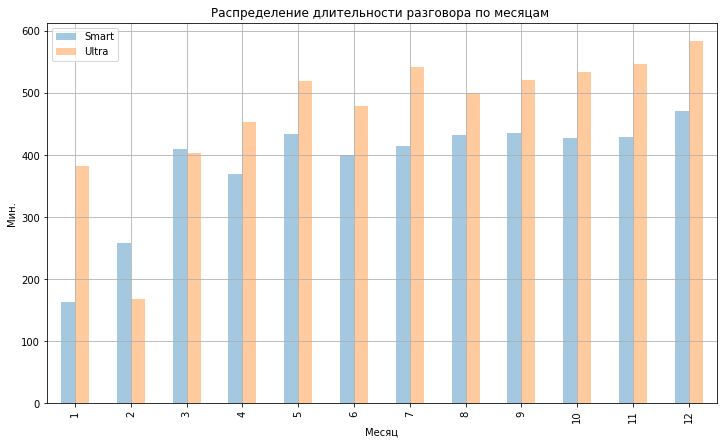

In [37]:
# Построим таблицу и график распределения длительности звонков по месяцам
table_call = df_new.pivot_table(index='month', columns='tariff', values='duration', aggfunc={'median'})
table_call.columns=['Smart','Ultra']
display(table_call)


table_call.plot(kind='bar',grid=True, alpha=0.4, figsize = (12,7))
plt.title('Распределение длительности разговора по месяцам ')
plt.xlabel('Месяц')
plt.ylabel('Мин.')
plt.legend(['Smart','Ultra'])
plt.show()

In [38]:
# Посмотрим статистику
display('Статистика по звонкам тарифа «Смарт»',df_smart['duration'].describe())
display('Статистика по звонкам тарифа «Ультра»',df_ultra['duration'].describe())

# Посчитаем среднее количество, дисперсию и стандартное отклонение

#table_call_2.columns = ['Среднее', 'Дисперсия', 'Стандартное отклонение']
table_call_2 = (df_new.pivot_table(index='tariff', values='duration', aggfunc = ['median', 'mean', np.var, np.std])
                .style.format('{:.1f}'))
table_call_2

'Статистика по звонкам тарифа «Смарт»'

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

'Статистика по звонкам тарифа «Ультра»'

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

,median,mean,var,std
,duration,duration,duration,duration
tariff,,,,
smart,422.0,417.9,36219.3,190.3
ultra,518.0,526.6,100873.6,317.6


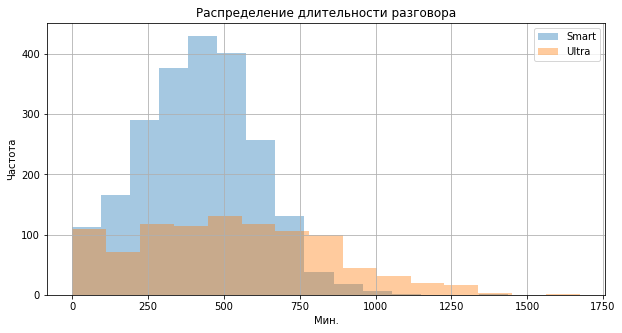

In [39]:
# Построим гистограмму
df_smart['duration'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
df_ultra['duration'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение длительности разговора')
plt.xlabel('Мин.')
plt.ylabel('Частота')
plt.show()

**1. Тариф «Смарт»**

Включено 500 минут разговора. Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля.

На гистограмме видно, смещение вправо, в основном длительность звонков равна 250-550 мин. 

~25% пользователей переплачивают за превышение лимита.

- Среднее 418 мин;
- Дисперсия 36219;
- Стандартное отклонение 190.

**2. Тариф «Ультра»**

Включено 3000 минут разговора. Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль.

Абонентов данного тарифа, почти в 2 раза меньше чем абонентов «Смарт», как видно на гистограмме средняя продолжительность звонка 250-750мин. Так же в отличие от предыдущего тарифа показатели по звонкам «Ультра» далеки от тарифного лимита. 

- Среднее 526 мин;
- Дисперсия 100873;
- Стандартное отклонение 317.
____

### Сообщения

,Smart,Ultra
month,,
1,15.0,32.0
2,20.0,5.5
3,23.0,20.0
4,28.0,17.0
5,30.0,25.0
6,28.0,27.5
7,29.0,38.0
8,27.0,40.0
9,30.0,43.0


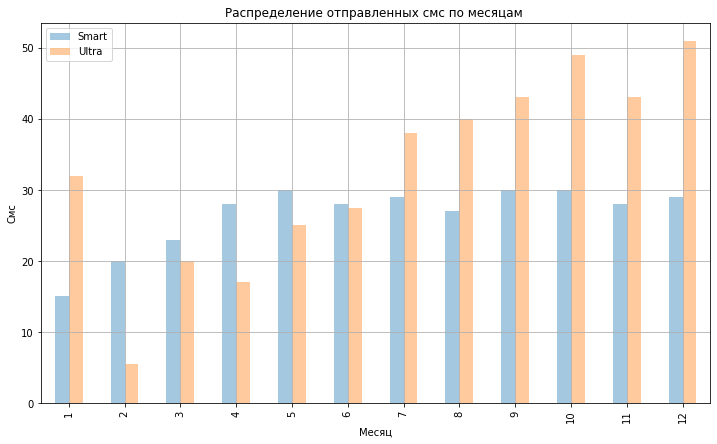

In [40]:
# Построим таблицу и график распределения отправленных смс по месяцам
table_sms = df_new.pivot_table(index='month', columns='tariff', values='messages', aggfunc={'median'})
table_sms.columns=['Smart','Ultra']
display(table_sms)

table_sms.plot(kind='bar',grid=True, alpha=0.4, figsize = (12,7))
plt.title('Распределение отправленных смс по месяцам ')
plt.xlabel('Месяц')
plt.ylabel('Смс')
plt.legend(['Smart','Ultra'])
plt.show()

In [41]:
# Посмотрим статистику
display('Статистика по сообщениям тарифа «Смарт»',df_smart['messages'].describe())
display('Статистика по сообщениям тарифа «Ультра»',df_ultra['messages'].describe())

# Посчитаем среднее количество, дисперсию и стандартное отклонение
#t1.columns = ['Среднее', 'Дисперсия', 'Стандартное отклонение']
table_sms_2 = (df_new.pivot_table(index='tariff', values='messages', aggfunc = ['median','mean', np.var, np.std])
               .style.format('{:.1f}'))
table_sms_2

'Статистика по сообщениям тарифа «Смарт»'

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

'Статистика по сообщениям тарифа «Ультра»'

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

,median,mean,var,std
,messages,messages,messages,messages
tariff,,,,
smart,28.0,33.4,796.8,28.2
ultra,38.0,49.4,2285.3,47.8


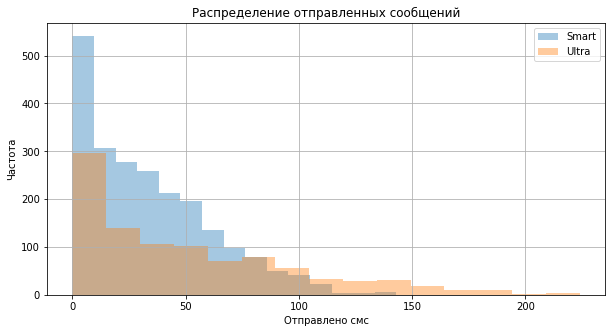

In [42]:
# Построим гистограмму
df_smart['messages'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
df_ultra['messages'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение отправленных сообщений')
plt.xlabel('Отправлено смс')
plt.ylabel('Частота')
plt.show()

**1. Тариф «Смарт»**

Включено 50 сообщений. Стоимость услуг сверх тарифного пакета: сообщение: 3 рубля.

На гистограмме пиковое значение до 10 сообщений. Так же есть скос вправо, малой части абонентов не хватает месячного лимита.

- Среднее 33 смс;
- Дисперсия 797;
- Стандартное отклонение 28.

**2. Тариф «Ультра»**

Включено 1000 сообщений. Стоимость услуг сверх тарифного пакета: сообщение: 1 рубля.

На гистограмме пик приходится до 20 сообщений, при этом почти равномерное распределение вправо от пика, но нет пользователей, которые превысили  бы тарифный лимит.

- Среднее 49 смс;
- Дисперсия 2285;
- Стандартное отклонение 48.

___

### Интернет-трафик

,Smart,Ultra
month,,
1,15.0,32.0
2,20.0,5.5
3,23.0,20.0
4,28.0,17.0
5,30.0,25.0
6,28.0,27.5
7,29.0,38.0
8,27.0,40.0
9,30.0,43.0


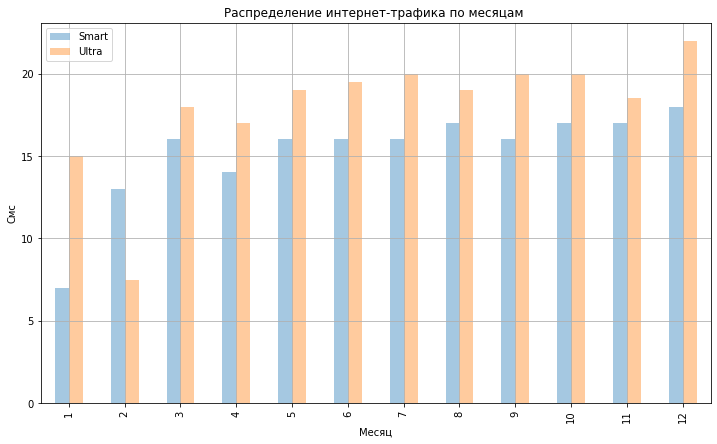

In [43]:
# Построим таблицу и график распределения интернет-трафика по месяцам
table_gb = df_new.pivot_table(index='month', columns='tariff', values='gb', aggfunc={'median'})
table_gb.columns=['Smart','Ultra']
display(table_sms)

table_gb.plot(kind='bar',grid=True, alpha=0.4, figsize = (12,7))
plt.title('Распределение интернет-трафика по месяцам ')
plt.xlabel('Месяц')
plt.ylabel('Смс')
plt.legend(['Smart','Ultra'])
plt.show()

In [44]:
# Посмотрим статистику)
display('Статистика по интернет-трафику тарифа «Смарт»',df_smart['gb'].describe())
display('Статистика по интернет-трафику тарифа «Ультра»',df_ultra['gb'].describe())

# Посчитаем среднее количество, дисперсию и стандартное отклонение
table_gb_2 = df_new.pivot_table(index='tariff', values='gb', aggfunc = ['median','mean', np.var, np.std]).style.format('{:.1f}')
table_gb_2

'Статистика по интернет-трафику тарифа «Смарт»'

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb, dtype: float64

'Статистика по интернет-трафику тарифа «Ультра»'

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb, dtype: float64

,median,mean,var,std
,gb,gb,gb,gb
tariff,,,,
smart,17.0,16.3,33.0,5.7
ultra,19.0,19.5,97.1,9.9


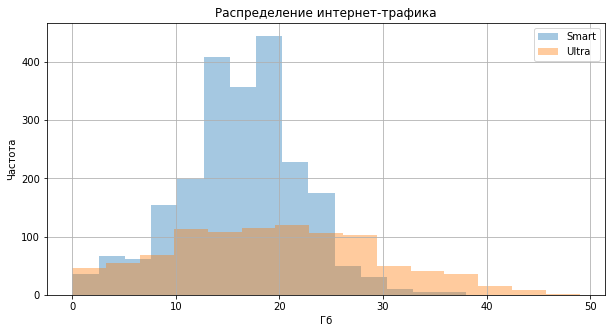

In [45]:
# Построим гистограмму
df_smart['gb'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
df_ultra['gb'].plot(kind='hist', bins=15, alpha=0.4, grid=True, figsize=(10, 5))
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение интернет-трафика')
plt.xlabel('Гб')
plt.ylabel('Частота')
plt.show()

**1. Тариф «Смарт»**

Включено 15 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: 1 Гб интернет-трафика: 200 рублей.

В основном абоненты расходуют от 12-20гб трафика. Большая часть покупает дополнительный трафик.

- Среднее 16 гб;
- Дисперсия 33;
- Стандартное 33 отклонение 5.7.

**2. Тариф «Ультра»**

Включено 30 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: 1 Гб интернет-трафика: 150 рублей.

Пиковые значения в интервале от 10 до 29гб. Так же есть абоненты, которые превышают тарифный лимит и переплачивают за дополнительный трафик.

- Среднее 19.5 гб;
- Дисперсия 97;
- Стандартное отклонение 10.

## Проверка гипотез.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую(H₀) и альтернативную(На) гипотезы:

- H₀ - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая;

- На - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Вычислим и составим таблицу с суммой дохода, медианным, средним значениям и дисперсией по обоим тарифам.

In [46]:
# Задам параметры таблице
table_payment = (df_new.pivot_table(index='tariff', values='payment', aggfunc = ['sum', 'median', 'mean', np.var])
                .style.format('{:.1f}'))
table_payment

,sum,median,mean,var
,payment,payment,payment,payment
tariff,,,,
smart,2875351.0,1023.0,1290.0,669785.7
ultra,2039100.0,1950.0,2070.2,141516.7


Для проверки гипотезы применим t-тест т.к.:
- Генеральные совокупности не зависят друг от друга;
- Выборочные средние должны быть нормально распределены;
- в значении `equal_var` укажу `False`, т.к. дисперсии выборок не равны.

Используем метод `st.ttest_ind()`

In [47]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
          df_smart['payment'], 
          df_ultra['payment'],
          equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

По результатам проверки опровергли нулевую гипотезу, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую(H₀) и альтернативную(На) гипотезы:
- H₀ - Средняя выручка пользователей из Москвы и пользователей из других регионов равна;

- На - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Вычислим и составим таблицу с суммой дохода, медианным, средним значением и дисперсией по обоим тарифам.

In [48]:
# Зададим датасет
df_moscow = df_new.query('city == "Москва"')
df_region = df_new.query('city != "Москва"')

In [49]:
table_city = (df_moscow.pivot_table(index='city', values='payment', aggfunc = ['sum', 'median', 'mean', np.var])
                .style.format('{:.1f}'))
table_city

,sum,median,mean,var
,payment,payment,payment,payment
city,,,,
Москва,945042.0,1750.0,1546.7,565636.5


In [50]:
print('Суммарный доход :', round(df_region['payment'].sum(), 2))
print('Медианный доход:', round(df_region['payment'].median(), 2))
print('Средний доход:', round(df_region['payment'].mean(), 2))
print('Дисперсия:', round(np.var(df_region['payment'], ddof = 1), 2))

Суммарный доход : 3969409
Медианный доход: 1583.0
Средний доход: 1524.94
Дисперсия: 654137.63


Для проверки гипотезы применим t-тест т.к.:
- Генеральные совокупности не зависят друг от друга;
- Выборочные средние должны быть нормально распределены;
- в значении `equal_var` укажу `False`, т.к. дисперсии выборок не равны.

Используем метод `st.ttest_ind()`

In [51]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
          df_moscow['payment'], 
          df_region['payment'],
          equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

По результатам проверки подтвердилась нулевая гипотеза, средняя выручка пользователей из Москвы и пользователей из других регионов равна(вероятность, что выручка будет одинаковая ~10%).

## Общий вывод.

В ходе проекта проанализировали данные абонентов тарифов «Ультра» и «Смарт» на выборке из 500 пользователей телеком-компании «Мегалайн». Выгрузили данные и провели исследование в следующем порядке:

1. Изучили файл с данными по абонентам, звонкам, сообщениям, интернет-трафику и тарифах.


2. Подготовили данные для дальнейшего анализа. Преобразовали столбцы с датами из типа object в datetime. Проверили на дубликаты и пропуски таблицы. Объединили таблицы в один датасет, а так же добавили следующие столбцы:


- Количество сделанных звонков и израсходованных минут разговора по месяцам;
- Количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- Помесячную выручку с каждого пользователя.


3. Провели исследовательский анализ данных.

- В среднем длительность звонков пользователей тарифа «Смарт» равна 250-550 мин (лимит 500 мин), а пользователей «Ультра» 250-750мин (лимит 3000). По минутам разговора абоненты «Ультра» не превышают тарифный лимит. Абоненты «Смарт» примерно 25% предпочитают за превышение тарифного лимита.

- В месяц среднестатистический пользователей тарифа  «Смарт» отправляет до 10 сообщений (лимит 50), а пользователей «Ультра» 20 смс (лимит 1000). Услуги sms сообщений не пользуются популярностью у абонентов обоих тарифов. Учитывая, что на данный момент мобильный интернет пользуется большим спросом, пользователи предпочитают обмениваться сообщениями в мессенджерах. 

- В основном абоненты «Смарт» расходуют от 12-20гб трафика. Большая часть покупает дополнительный трафик. У пользователей тарифа «Ультра» значения в интервале от 10 до 29гб. Именно услуга интрнет-трафика пользуется популярностью, т.к. пользователи обоих тарифов превышают лимит и переплачивают за дополнительные гигабайты. 

- Пользователей тарифа «Смарт» - 350,  тарифа «Ультра» - 148. При этом средний доход от пользователя «Ультра» больше (2070 руб), чем у «Смарт» (1270 руб), даже с учётом переплат за превышение тарифного плана.


4. Так же проверили 2 гипотезы и следующие оказались верны:
- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- Средняя выручка пользователей из Москвы и пользователей из других регионов равна

**Рекомендации**

Учитывая вышеизложенное будет лучше продвигать в рамках рекламной компании тариф «Ультра». Доступность цены тарифа «Смарт»  и так привлекает в 2 раза больше пользователей. Пользователи «Ультра» не превышают лимит, а соответственно не переплачивают, при этом средний доход  с абонентов «Ультра» выше, даже с учётом переплат в абонентов «Смарт». Средняя выручка с пользователей Москвы и других регионов равна, поэтому можно отдельно не индивидуализировать рекламную компанию под эти рынки.